In [2]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from pprint import pprint

In [3]:
df1 = pd.read_excel('C:/2022-2/New_Decoy/BEST/result/HEK(precursor_swap)/TPRP_10.xlsx')
df1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.00001.00001.3,1,DNISHMEIEK/3,0.181,0.0303,[2],0,-0.00913,17,0.0651,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q06136|KDSR_HUMAN(pre=K,post=Q)",635204062.0
1,b1906_293T_proteinID_01A_QE3_122212.00002.00002.3,1,DFEERMK/3,0.129,0.0010,[2],0,0.33500,9,0.0700,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|O43809|CPSF5_HUMAN(pre=R,post=I)",829050133.0
2,b1906_293T_proteinID_01A_QE3_122212.00003.00003.2,1,LPLFDLK/2,0.156,0.0040,[2],0,0.00300,47,0.0630,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q8WV99|ZFN2B_HUMAN(pre=R,post=C)",777951378.0
3,b1906_293T_proteinID_01A_QE3_122212.00004.00004.2,1,SFSSPTQC[160]SHC[160]TSLMVGLIR/2,0.077,0.0050,[2],0,-0.00300,10,0.0470,...,-1,0,0,(),Normal,Unk,Unk,0,426247659,NaN
4,b1906_293T_proteinID_01A_QE3_122212.00006.00006.2,1,MMASLLEASFPETDEMR/2,0.118,0.0160,[2],0,0.00700,13,0.0570,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P09471|GNAO_HUMAN(pre=R,post=L)",822870897.0


In [4]:
ID = df1['ID'].values.tolist()
ID

['DNISHMEIEK/3',
 'DFEERMK/3',
 'LPLFDLK/2',
 'SFSSPTQC[160]SHC[160]TSLMVGLIR/2',
 'MMASLLEASFPETDEMR/2',
 'SPAKPVQTITPHGK/4',
 'QASNNINQTDSTSTSTLR/2',
 'PVTAYDGFVQYIPFDDPR/2',
 'TQLDWYEPGEQEIWPAR/2',
 'GGTEVGAGGGFGSDFLDHQWK/2',
 'QAAEVQQDREWSGSVDR/2',
 'DLEDGEVPQHAGK/3',
 'QHLHIPLEIK/3',
 'VPFGHAHNHAK/4',
 'NFC[160]SAVQYGNAQIIEC[160]LKENK/3',
 'PREDPKSNIVEWSESLSR/3',
 'VLNSPGVWHK/2',
 'VDGVAYASAARPK/3',
 'AILLLQTAEDQDTYNVAIR/3',
 'HGPADLITFHK/2',
 'VGDTVVGTRDPKVK/3',
 'YLGGDGLDVDVPTR/2',
 'ELHSWEPEPDVR/2',
 'QLEPVKNK/3',
 'EAGKEPAEGGGGDGSHR/3',
 'TQLERLEEIHLLK/4',
 'DM[147]LESPDFSTVLNTC[160]LNR/2',
 'WINLHLEK/2',
 'VPLVAPEDLR/2',
 'VVFELFSDVC[160]PK/3',
 'TKEQFGQDGPITVHC[160]SAGVGR/4',
 'AAALLDK/2',
 'HFPMAPDLHTPLHSR/4',
 'LSC[160]NHVFHEFC[160]IR/4',
 'DAGLHC[160]LELGHTGEAGPHAMVR/5',
 'DVIQGLLRR/2',
 'MLSLLVVDVGNPEEVR/3',
 'APLMWELIHK/2',
 'IIHEAGYSEEEC[160]K/3',
 'TPTPVHYRPHGAK/4',
 'ADGAGEAK/2',
 'C[160]VAALTR/2',
 'LYQQILFHAIIK/3',
 'KAAVGVK/2',
 'LTERQPEDKTKLK/4',
 'NM[147]DHHILHV

In [4]:
f = open("Target_predicted_10__revDecoy_predicted_10.msp")
total = 0
lib = {}
sequence = []

while True:
    if not total:
        line = f.readline()
    
    if not line: break
    
    if line.startswith('Name'):
        total += 1
        if not total % 50000:
            print(total)
        
        seq = line[6:-1]
        s = seq.split('/') # 'CIMDGDYYYK', '2_2(0,C,CAM)(2,M,Oxidation)' 
        cs = s[1][0]
        
        # modification이 있으면
        if len(s[1]) > 1:
            
            nummod = int(s[1][2]) # modification 개수
            
            # modification이 0으로 있을 때
            if not nummod:
                seq = seq[:-2]
            
            # modification이 1개 이상 있을 때
            else:
                modinfo = s[1][3:]     # (0,C,CAM)(2,M,Oxidation)        
                m = modinfo.split('(') # '', '0,C,CAM)', '2,M,Oxidation)'
                
                where = []
                what = []
                for i in range(0, nummod):
                    w = m[i+1].split(',')
                    where_ = int(w[0])
                    what_ = w[1]
                    where.append(where_) # [0, 2]
                    what.append(what_)   # ['C', 'M'] 
                
                newseq = ''
                amino = s[0] # CIMDGDYYYK'
                index = 0
                for i in range(len(amino)):
                    newseq += amino[i]
                    
                    if index < nummod:
                        if where[index] == i:
                            if what[index] == 'C':
                                newseq += '[160]'
                            elif what[index] == 'M':
                                newseq += '[147]'
                            index += 1
                seq = newseq + '/' + cs

        #print(seq)
        sequence.append(seq)
        
        line = f.readline()
        line = f.readline()
        line = f.readline()
        line = f.readline()
        
        peaks = []
        while True:
            if line.startswith('Name:'):
                break
            if line.startswith('\n'):
                break
            if not line: break
            
            data = line.split('\t')
            mz = float(data[0])
            inten = float(data[1])
            peak = [mz, math.sqrt(inten)]
            peaks.append(peak)
            
            line = f.readline()
        
        #pprint(peaks)
        lib[seq] = peaks

f.close()
print(total)

50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
749991


In [5]:
cnt = 0
LIB_SPEC = []

for i in ID:
    if lib.get(i) is None:
        cnt += 1
        #print(i)
        
        s1 = i.split('[')
        #print(s1)
        key = s1[0]
        
        for j in range(1, len(s1)):
            s2 = s1[j].split(']')
            #print(s2)
            key += s2[1]
            
        #print(key)
        LIB_SPEC.append(lib[key])
        
    else:
        LIB_SPEC.append(lib[i])
        
print(cnt)
print(len(ID))

151848
830969


In [51]:
seq_df = pd.DataFrame(sequence, columns = ['seq'])
seq_df

,seq
0,AAAAAAAAAAAAAAAGAGAGAK/2
1,AAAAAAAAAAAAAAAGAGAGAK/3
2,AAAAAAAAAAAPPAPPEGASPGDSAR/2
3,AAAAAAAAAAAPPAPPEGASPGDSAR/3
4,AAAAAAAAAVSR/2
...,...
749986,DQPNVAWYYYR/2
749987,PTIGSSDAPNIVWYYYK/2
749988,WMYYYYK/2
749989,WM[147]YYYYK/2


In [52]:
seq_df.to_excel('C:/2022-2/seq3.xlsx', header = True, index = False)

In [8]:
print(len(LIB_SPEC))
print(len(ID))
LIB_SPEC

830969
830969


[[[115.542213, 7.183881819740634],
  [147.112808, 160.91364896738872],
  [172.084244, 12.775541319255321],
  [215.60025, 12.941913537031532],
  [230.077148, 149.33096875062452],
  [276.155396, 111.98573056421073],
  [367.518341, 23.79299802462901],
  [389.239471, 107.77007110974735],
  [393.694366, 237.89185772741362],
  [437.210388, 316.22776601683796],
  [493.752411, 177.20867003620336],
  [518.282043, 117.66600509068029],
  [550.773865, 70.09061134702706],
  [649.32251, 190.57831270635177],
  [786.38147, 114.31357824423134],
  [827.335205, 22.7268309713431],
  [873.413452, 129.33572260593746]],
 [[58.520748, 10.309525498295253],
  [131.386597, 12.500161678954397],
  [147.112808, 254.16862429694189],
  [217.630844, 104.3244807559568],
  [226.434494, 18.817140271571553],
  [263.102631, 67.22800951984225],
  [278.15329, 155.25570654246496],
  [282.15213, 106.71566220100965],
  [346.673431, 61.438286605340814],
  [434.254395, 197.01961625178342],
  [563.296997, 316.22776601683796],
  [6

In [9]:
list1 = df1['### Query'].values.tolist()
list1 ########################################################################

['b1906_293T_proteinID_01A_QE3_122212.00001.00001.3',
 'b1906_293T_proteinID_01A_QE3_122212.00002.00002.3',
 'b1906_293T_proteinID_01A_QE3_122212.00003.00003.2',
 'b1906_293T_proteinID_01A_QE3_122212.00004.00004.2',
 'b1906_293T_proteinID_01A_QE3_122212.00006.00006.2',
 'b1906_293T_proteinID_01A_QE3_122212.00007.00007.4',
 'b1906_293T_proteinID_01A_QE3_122212.00008.00008.2',
 'b1906_293T_proteinID_01A_QE3_122212.00009.00009.2',
 'b1906_293T_proteinID_01A_QE3_122212.00010.00010.2',
 'b1906_293T_proteinID_01A_QE3_122212.00011.00011.2',
 'b1906_293T_proteinID_01A_QE3_122212.00012.00012.2',
 'b1906_293T_proteinID_01A_QE3_122212.00013.00013.3',
 'b1906_293T_proteinID_01A_QE3_122212.00014.00014.3',
 'b1906_293T_proteinID_01A_QE3_122212.00015.00015.4',
 'b1906_293T_proteinID_01A_QE3_122212.00016.00016.3',
 'b1906_293T_proteinID_01A_QE3_122212.00017.00017.3',
 'b1906_293T_proteinID_01A_QE3_122212.00018.00018.2',
 'b1906_293T_proteinID_01A_QE3_122212.00019.00019.3',
 'b1906_293T_proteinID_01A_Q

In [10]:
file_name = ['b1906_293T_proteinID_01A_QE3_122212',
            'b1922_293T_proteinID_02A_QE3_122212',
            'b1923_293T_proteinID_03A_QE3_122212',
            'b1924_293T_proteinID_04A_QE3_122212',
            'b1925_293T_proteinID_05A_QE3_122212',
            'b1926_293T_proteinID_06A_QE3_122212',
            'b1927_293T_proteinID_07A_QE3_122212',
            'b1928_293T_proteinID_08A_QE3_122212',
            'b1929_293T_proteinID_09A_QE3_122212',
            'b1930_293T_proteinID_10A_QE3_122212',
            'b1931_293T_proteinID_11A_QE3_122212',
            'b1932_293T_proteinID_12A_QE3_122212',
            'b1937_293T_proteinID_01B_QE3_122212',
            'b1938_293T_proteinID_02B_QE3_122212',
            'b1939_293T_proteinID_03B_QE3_122212',
            'b1940_293T_proteinID_04B_QE3_122212',
            'b1941_293T_proteinID_05B_QE3_122212',
            'b1942_293T_proteinID_06B_QE3_122212',
            'b1943_293T_proteinID_07B_QE3_122212',
            'b1944_293T_proteinID_08B_QE3_122212',
            'b1945_293T_proteinID_09B_QE3_122212',
            'b1946_293T_proteinID_10B_QE3_122212',
            'b1947_293T_proteinID_11B_QE3_122212',
            'b1948_293T_proteinID_12B_QE3_122212']
len(file_name)

24

In [11]:
f = open("C:/2022-2/New_Decoy/BEST/PEAK/HEK_data/precursor_swap/b1906_293T_proteinID_01A_QE3_122212.mgf")

for i in range(0, 1000):
    line = f.readline()
    print(line)
    
f.close()

BEGIN IONS

SCANS=1873

TITLE=b1906_293T_proteinID_01A_QE3_122212.1873.1873.3 File:"b1906_293T_proteinID_01A_QE3_122212.raw", NativeID:"controllerType=0 controllerNumber=1 scan=1873"

RTINSECONDS=1588.30452

PEPMASS=405.851531982422 6073793.670897999778

CHARGE=3+

110.0719528 5223.6875

112.0871887 32897.21875

112.0937119 2058.2592773438

113.0716171 11347.8955078125

114.0664978 2344.7897949219

115.0507736 3586.9104003906

115.0868225 43052.4375

116.0709152 19463.064453125

127.0508194 1947.5689697266

129.1021271 1804.0125732422

130.0975189 3335.9143066406

136.0622406 1538.6357421875

141.0653687 1897.8801269531

141.1027222 2247.4431152344

151.8694611 1418.6687011719

152.0822144 1665.4227294922

155.0819244 2075.9201660156

157.0974731 11663.51953125

157.1092224 2381.1018066406

158.0923615 52436.92578125

158.1043549 2455.5698242188

167.0381012 1459.7645263672

167.0817719 1813.0936279297

175.1190643 83178.7265625

175.1347961 3220.7153320313

176.1222534 3157.8720703125

In [49]:
search = []
idx = 0 # 0~23

s = []
for i in list1:
    q = i.split('.')
    
    if q[0] != file_name[idx]:
        idx += 1
        search.append(s)
        s = []
        
    if q[0] == file_name[idx]:
        #print(q[0])
        scan = int(q[1])
        cs = int(q[3])
        s.append([scan, cs])
        
search.append(s)

In [50]:
print(len(search))
search

24


[[[1, 3],
  [2, 3],
  [3, 2],
  [4, 2],
  [6, 2],
  [7, 4],
  [8, 2],
  [9, 2],
  [10, 2],
  [11, 2],
  [12, 2],
  [13, 3],
  [14, 3],
  [15, 4],
  [16, 3],
  [17, 3],
  [18, 2],
  [19, 3],
  [21, 3],
  [22, 2],
  [24, 3],
  [25, 2],
  [26, 2],
  [27, 3],
  [28, 3],
  [29, 4],
  [30, 2],
  [31, 2],
  [32, 2],
  [33, 3],
  [35, 4],
  [36, 2],
  [37, 4],
  [38, 4],
  [39, 5],
  [40, 2],
  [41, 3],
  [42, 2],
  [43, 3],
  [45, 4],
  [47, 2],
  [48, 2],
  [49, 3],
  [50, 2],
  [53, 4],
  [54, 4],
  [55, 3],
  [56, 2],
  [58, 2],
  [60, 3],
  [61, 3],
  [62, 4],
  [63, 3],
  [64, 2],
  [65, 4],
  [66, 2],
  [67, 2],
  [68, 4],
  [69, 2],
  [70, 2],
  [71, 3],
  [72, 2],
  [73, 2],
  [74, 5],
  [76, 4],
  [77, 4],
  [78, 4],
  [79, 5],
  [80, 3],
  [81, 2],
  [82, 4],
  [83, 2],
  [84, 2],
  [86, 4],
  [87, 2],
  [88, 3],
  [89, 2],
  [90, 2],
  [91, 4],
  [92, 3],
  [93, 3],
  [94, 3],
  [95, 4],
  [96, 3],
  [97, 2],
  [98, 3],
  [99, 4],
  [100, 4],
  [101, 3],
  [103, 2],
  [104, 2],
  [

In [62]:
import math
import numpy as np
from pprint import pprint

def DotProduct(MS2, LIB):
    mz = [0]
    lib = [0]
    ms2 = [0]
    
    libidx = 0
    ms2idx = 0
    
    while True:
        if libidx == len(LIB):
            while True:
                if ms2idx == len(MS2): break
                mz += [MS2[ms2idx][0]]
                lib += [0]
                ms2 += [MS2[ms2idx][1]]
                ms2idx += 1
            break
        if ms2idx == len(MS2):
            while True:
                if libidx == len(LIB): break
                mz += [LIB[libidx][0]]
                lib += [LIB[libidx][1]]
                ms2 += [0]
                libidx += 1
            break
    
        if abs(LIB[libidx][0] - MS2[ms2idx][0]) <= 0.05:
            mz += [(LIB[libidx][0] + MS2[ms2idx][0]) / 2]
            lib += [LIB[libidx][1]]
            ms2 += [MS2[ms2idx][1]]
            libidx += 1
            ms2idx += 1
        elif LIB[libidx][0] < MS2[ms2idx][0]:
            mz += [LIB[libidx][0]]
            lib += [LIB[libidx][1]]
            ms2 += [0]
            libidx += 1
        else:
            mz += [MS2[ms2idx][0]]
            lib += [0]
            ms2 += [MS2[ms2idx][1]]
            ms2idx += 1

    del mz[0]
    del lib[0]
    del ms2[0]
    
    peak_match = 0
    
    for k in range(len(lib)):
        if lib[k] != 0 and ms2[k] != 0:
            peak_match += 1
    
    #similarity = np.dot(lib, ms2) / math.sqrt(np.dot(lib, lib) * np.dot(ms2, ms2))
    
    #return similarity
    return peak_match

In [70]:
# i -> 0~23 : search를 돌면서 해당하면 호출
cnt = 0
lib_idx = 0
PEAK_MATCH = []

for i in range(0, 24):
    print(i)
    idx = 0 # 한 파일 내의 서치 결과를 돌면서 해당하면 호출
    print(idx)
    file = 'C:/2022-2/New_Decoy/BEST/PEAK/HEK_data/precursor_swap/' + file_name[i] + '.mgf'
    print(file)
    
    f = open(file)
    name = file.split('/')[7][:-4] # b1906_293T_proteinID_01A_QE3_122212
    total = 0
    
    while True:
        line = f.readline()
    
        if not line: break
    
        if line.startswith('BEGIN'):
            total += 1
            if not total % 10000:
                print(total)
        
            line = f.readline()
            line = f.readline()
        
            query = line.split(' ')[0][6:]
            #print(query)
            cs = int(query[-1])
        
            check = [total, cs]
            #print(check)
        
            line = f.readline()
            line = f.readline()
            line = f.readline()
            line = f.readline()
        
            peaks = []
            while True:
                if line.startswith('END'):
                    break
                if not line: break
            
                data = line.split(' ')
                mz = float(data[0])
                inten = float(data[1])
                peak = [mz, math.sqrt(inten)]
                peaks.append(peak)
            
                line = f.readline()
            
            #pprint(peaks)
            if check == search[i][idx]:
                cnt += 1
                PEAK_MATCH.append(DotProduct(peaks, LIB_SPEC[lib_idx]))
                lib_idx += 1
                if len(search[i]) - 1 > idx:
                    idx += 1

    f.close()
print(total)
print(cnt)

0
0
C:/2022-2/New_Decoy/BEST/PEAK/HEK_data/precursor_swap/b1906_293T_proteinID_01A_QE3_122212.mgf
10000
20000
30000
1
0
C:/2022-2/New_Decoy/BEST/PEAK/HEK_data/precursor_swap/b1922_293T_proteinID_02A_QE3_122212.mgf
10000
20000
30000
2
0
C:/2022-2/New_Decoy/BEST/PEAK/HEK_data/precursor_swap/b1923_293T_proteinID_03A_QE3_122212.mgf
10000
20000
30000
3
0
C:/2022-2/New_Decoy/BEST/PEAK/HEK_data/precursor_swap/b1924_293T_proteinID_04A_QE3_122212.mgf
10000
20000
30000
4
0
C:/2022-2/New_Decoy/BEST/PEAK/HEK_data/precursor_swap/b1925_293T_proteinID_05A_QE3_122212.mgf
10000
20000
30000
5
0
C:/2022-2/New_Decoy/BEST/PEAK/HEK_data/precursor_swap/b1926_293T_proteinID_06A_QE3_122212.mgf
10000
20000
30000
6
0
C:/2022-2/New_Decoy/BEST/PEAK/HEK_data/precursor_swap/b1927_293T_proteinID_07A_QE3_122212.mgf
10000
20000
30000
40000
7
0
C:/2022-2/New_Decoy/BEST/PEAK/HEK_data/precursor_swap/b1928_293T_proteinID_08A_QE3_122212.mgf
10000
20000
30000
8
0
C:/2022-2/New_Decoy/BEST/PEAK/HEK_data/precursor_swap/b1929_29

In [73]:
len(PEAK_MATCH)

830969

In [74]:
len(df1)

830969

(0.0, 15.0)

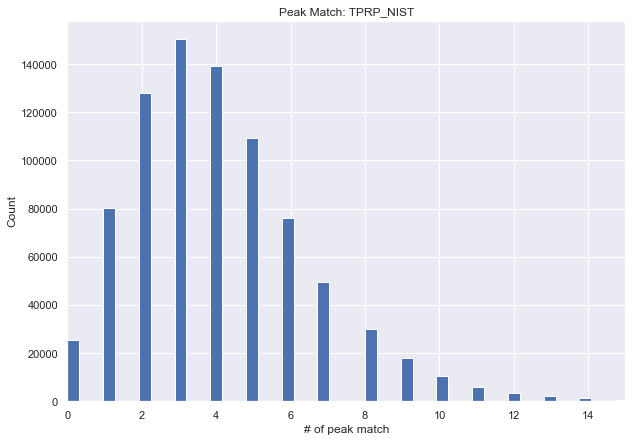

In [90]:
plt.figure(figsize = (10, 7))
plt.xlabel('# of peak match')
plt.ylabel('Count')
plt.title('Peak Match: TPRP_NIST')
PM_hist = plt.hist(PEAK_MATCH, bins = 100)
plt.xlim([0, 15])

In [92]:
pm = pd.DataFrame(PEAK_MATCH, columns = ['peak match'])
pm

,peak match
0,2
1,4
2,3
3,0
4,1
...,...
830964,1
830965,2
830966,0
830967,0


In [93]:
result = pd.concat([df1, pm], axis = 1)
result

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset,peak match
0,b1906_293T_proteinID_01A_QE3_122212.00001.00001.3,1,DNISHMEIEK/3,0.181,0.0303,[2],0,-0.00913,17,0.0651,...,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q06136|KDSR_HUMAN(pre=K,post=Q)",635204062.0,2
1,b1906_293T_proteinID_01A_QE3_122212.00002.00002.3,1,DFEERMK/3,0.129,0.0010,[2],0,0.33500,9,0.0700,...,0,0,(),Normal,Unk,Unk,1,"XXX_sp|O43809|CPSF5_HUMAN(pre=R,post=I)",829050133.0,4
2,b1906_293T_proteinID_01A_QE3_122212.00003.00003.2,1,LPLFDLK/2,0.156,0.0040,[2],0,0.00300,47,0.0630,...,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q8WV99|ZFN2B_HUMAN(pre=R,post=C)",777951378.0,3
3,b1906_293T_proteinID_01A_QE3_122212.00004.00004.2,1,SFSSPTQC[160]SHC[160]TSLMVGLIR/2,0.077,0.0050,[2],0,-0.00300,10,0.0470,...,0,0,(),Normal,Unk,Unk,0,426247659,NaN,0
4,b1906_293T_proteinID_01A_QE3_122212.00006.00006.2,1,MMASLLEASFPETDEMR/2,0.118,0.0160,[2],0,0.00700,13,0.0570,...,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P09471|GNAO_HUMAN(pre=R,post=L)",822870897.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830964,b1948_293T_proteinID_12B_QE3_122212.43622.43622.2,1,FVPLPKSADLAR/2,0.255,0.0430,[2],0,0.49100,116,0.0750,...,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9H2F5|EPC1_HUMAN(pre=R,post=C)",573355208.0,1
830965,b1948_293T_proteinID_12B_QE3_122212.43624.43624.2,1,PWFLLGGDER/2,0.223,0.0060,[2],0,0.00100,207,0.0710,...,0,0,(),Normal,Unk,Unk,0,373111788,NaN,2
830966,b1948_293T_proteinID_12B_QE3_122212.43625.43625.2,1,LIFNENDFVEGYYR/2,0.205,0.1050,[2],0,0.00400,34,0.0380,...,0,0,(),Normal,Unk,Unk,0,287141515,NaN,0
830967,b1948_293T_proteinID_12B_QE3_122212.43628.43628.2,1,ESPPPPLPGSR/2,0.238,0.0090,[2],0,0.49600,163,0.0580,...,0,0,(),Normal,Unk,Unk,1,"XXX_sp|O43516|WIPF1_HUMAN(pre=R,post=P)",905556808.0,0


In [94]:
result.to_excel('C:/2022-2/New_Decoy/BEST/result/HEK(precursor_swap)/TPRP_10_peak_match.xlsx', header=True, index=False)